# <font color=green> **AULA PRÁTICA 3 - CLASSIFICAÇÃO**
-----

## Objetivo:

* Mostrar o pacote scikit-learn: https://scikit-learn.org/stable/


* Mostrar o funcionamento de um estudo de classificação que contém as etapas:

1. Entrada de dados pre-processados
2. Separação treino e teste
3. Ajuste de Modelos e otimização de parâmetros na série de treinamento
4. Avaliação de Resultados na Série de Teste


<br>

---

**OBS:** Iremos olhar o dataset Titanic, mostrado na Aula Prática 2. Os dados de entrada desta aula são os dados finais da etapa de pré-processamento.


<br>


* **Objetivo do dataset:**

Queremos prever quais os passageiros sobreviveram ao desastre, a partir de diferentes variáveis (X) disponibilizados.  <font color=red> (Agora já sabemos que se trata de um problema supervisionado de classificação binária)

---
  






-------
# Parte 0 - Apresentando o Pacote Scikit-learn


* Biblioteca do Python destinada a aplicações de Machine Learning.
* Inclui diferentes algoritmos de classificação, regressão e agrupamento. Além disso, tem funções de normalização, métricas de avaliação, métodos de seleção de variáveis, etc. Scikit-learn é um pacote com muitas funcionalidades para Ciência de Dados.


<br>


**Vamos começar olhando a página inicial da biblioteca:**

https://scikit-learn.org/stable/

<br>

**Tutoriais:**

https://scikit-learn.org/stable/tutorial/index.html

<br>

**Explicação dos métodos:**

https://scikit-learn.org/stable/user_guide.html#user-guide


-------
# Parte 1 - Leitura do dataset e Importando Pacotes

In [125]:
# Importando pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
# lendo o arquivo
df = pd.read_excel('/content/drive/My Drive/2020/Matéria Data Science/aula pratica 3/df_titanic_processado.xlsx',index_col = 0)

In [127]:
df.head()
# OBS: Sex: 1 - masculino, 0 - feminino; Embarked_Q - Queenstown; Embarked_S - Southampton
# OBS2: Survived: Não sobreviveu: 0; Sobreviveu: 1

,Survived,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [128]:
# OBS: Survived (o y desejado) já está certo, não precisamos fazer nada. Mas, vamos utilizar este comando apenas para mostrar o que faríamos se tivessemos variáveis categóricas e precisassemos transformar para número
df['Survived'] = df['Survived'].apply(lambda x: 'Não Sobreviveu' if x == 0 else 'Sobreviveu')

In [129]:
df.head()

,Survived,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
0,Não Sobreviveu,3,22.0,7.2500,1,1,0,1
1,Sobreviveu,1,38.0,71.2833,1,0,0,0
2,Sobreviveu,3,26.0,7.9250,0,0,0,1
3,Sobreviveu,1,35.0,53.1000,1,0,0,1
4,Não Sobreviveu,3,35.0,8.0500,0,1,0,1


-------
# Parte 2 - Separação Treino e Teste

* Em um estudo de ML, geralmente deixamos parte dos dados para serem avalidados no final do processo. Treinamos nosso modelo com a **Série de Treinamento** e Validamos com a **Série de Teste**.

Boa Referência:

https://scikit-learn.org/stable/modules/cross_validation.html



 **ESQUEMA**

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1qlv8Kce0_TDI6g43gNOuBbWP7upCOZrz' />
<figcaption>ESQUEMA DE TREINO E TESTE</figcaption></center>
</figure>



## 2.1 - Divisão da série X (variáveis independentes) e y (variável dependente):

In [130]:
df.head()

,Survived,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
0,Não Sobreviveu,3,22.0,7.2500,1,1,0,1
1,Sobreviveu,1,38.0,71.2833,1,0,0,0
2,Sobreviveu,3,26.0,7.9250,0,0,0,1
3,Sobreviveu,1,35.0,53.1000,1,0,0,1
4,Não Sobreviveu,3,35.0,8.0500,0,1,0,1


In [131]:
X = df.drop(['Survived'],1)   # retirar a coluna y (Survived)
y = df[["Survived"]]          # coluna y 

## 2.2 - Transformar a variável dependente (y) em binária:

Caso a variável y esteja como nome, precisamos passar para número.



In [134]:
# Forma 1 - fazendo a mão
y_1 = y['Survived'].apply(lambda x: 0 if x == 'Não Sobreviveu' else 1)
y_1.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [135]:
# Forma 2 - usando scitkit
from sklearn.preprocessing import LabelEncoder             # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
labelencoder_y = LabelEncoder()                            # Chamando o comando para transformar variável dependente categórica em numérica
y = labelencoder_y.fit_transform(y)                        # 0: Não sobreviveu; 1: Sobreviveu  (ordem alfabética) - saída é um array
y = pd.DataFrame(y,columns = ['Survived'])                 # Para retornamos a saída para um dataframe

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## 2.3 - Divisão do dataset em treino e teste 


* test_size -> porcentagem (float) ou quantidade de valores (int) que será separada para a série de teste (X_test e y_test);
* random_state ->  semente que se fixa os registros de treino e teste. O train_test_split separa aleatoriamente amostras para treino e teste. Para controle do experimento, é aconselhável se trabalhar sempre com as mesmas amostras de treino/teste;
* stratify -> separa respeitando a proporção de valores de cada classe da variavel dada;
* Shuffle -> embaralha os dados.

In [137]:
# Importando módulo para fazer esta divisão automaticamente (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
from sklearn.model_selection import train_test_split

In [ ]:
# Separando X_train, X_test, y_train e y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y, shuffle = True)

In [143]:
# Avaliando as divisões
print(f'Série de treino: {len(X_train)}')              # número de amostras no treino
print(f'Série de treino: {len(X_test)}')               # número de amostras no teste
print(f'Fração separada para teste: {round(len(X_test)/len(X),1)}')    # fração no conjunto de teste

Série de treino: 710
Série de treino: 178
Fração separada para teste: 0.2


In [147]:
X_train.head()

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
510,3,29.0,7.7500,0,1,1,0
832,3,25.0,7.2292,0,1,0,0
815,1,38.0,0.0000,0,1,0,1
717,2,27.0,10.5000,0,0,0,1
84,2,17.0,10.5000,0,0,0,1


In [ ]:
X.head()

# Parte 3- Ajuste de Modelos e parâmetros na Série de Treinamento

## 3.1 - Divisão das amostras para validação cruzada

* O que fazer?

  - Na série de treinamento, dividir os grupos que serão posteriormente avaliados. O resultado do k fold será as posições dos registros do grupo k. Por exemplo, imaginando que nossa série de treinamento seja um dataframe com 8 registros (posição das linhas: [0,1,2,3,4,5,6,7]) e iremos dividir em 3 folds, ou seja, k = 3. Teremos uma divisão aleatória, podendo por exemplo:

    - k = 1: [0,3,6], que significa que iremos treinar nas linhas [1,2,4,5,7] e testar em [0,3,6]

    - k = 2: [7,1,4], que significa que iremos treinar nas linhas [0,2,3,5,6] e testar em [7,1,4]

    - k = 3: [5,2], que significa que iremos treinar nas linhas [0,1,3,4,6,7] e testar em [5,2]

  * Para que isto?
    - Assim, para cada k, iremos obter uma métrica de avaliação, e a partir dos diferentes testes, verificar se as métricas obtidas estão parecidas entre os casos e se está acontecendo overfitting. Podemos comparar diferentes modelos, diferentes casos (por exemplo, selecionar variáveis, ajustar diferentes parâmetros).  


<br>

Referências:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection


https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

<br>

**ESQUEMA VALIDAÇÃO CRUZADA**

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1TLNnUhtexZ3HEmgpX0KGdLz4PebSEIXd' />
<figcaption>ESQUEMA VALIDAÇÃO CRUZADA </figcaption></center>
</figure>



GERANDO AS AMOSTRAS DA VALIDAÇÃO CRUZADA:

In [148]:
# Pacote para Validação Cruzada com Kfold estratificado (para garantir a proporção  das classes)
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Objeto com as amostras separadas para cada k
kfold = StratifiedKFold(n_splits=10,shuffle = True, random_state = 0)         

* StratifiedKFold ->  separa as amostras de cada Fold K de forma estratificada (respeitando a proporção de cada classe)
* n_splits -> o número de divisões feitas na série

In [150]:
for train_index, test_index in kfold.split(X_train, y_train):   # As divisões dos k folds serão feitas na série de Treinamento: X_train, y_train
    print(test_index)        # imprimindo os índices dos k testes, somente para verificar como a amostras estão distribuídas                                    

[  2  12  22  24  27  28  29  38  44  54  56  63 117 120 121 126 128 136
 146 155 156 158 159 171 178 182 196 199 204 228 238 246 256 264 268 270
 289 303 308 315 331 347 355 363 371 391 420 425 441 454 467 470 482 496
 499 516 527 530 569 575 585 607 627 631 641 653 664 683 684 694 702]
[ 11  30  40  41  51  96 103 104 111 115 123 124 138 168 187 191 194 202
 221 227 237 247 250 255 281 283 296 301 319 326 336 340 353 367 372 373
 394 395 400 401 437 455 459 461 495 505 508 509 521 534 536 539 543 547
 550 553 557 567 578 580 593 603 605 610 635 651 655 671 676 681 699]
[  0   5   7  18  33  48  52  60  66  67  80  82  83 106 164 179 185 186
 211 214 229 248 260 277 278 286 287 288 291 302 322 323 344 346 351 352
 357 361 365 369 384 387 396 403 414 433 453 456 457 473 474 483 498 507
 512 541 604 614 626 628 630 632 639 647 650 652 657 666 667 674 696]
[ 26  58  59  61  62  72  81  94  97 101 129 169 174 176 181 208 213 216
 218 230 242 258 261 271 293 305 337 338 343 359 362 374 379

# Parte 4 - Modelos de Classificação

## 4.1 - Naive Bayes

Referência:

https://scikit-learn.org/stable/modules/naive_bayes.html

<br>

Comandos:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


### Naive Bayes - Caso 1

  * Exemplo simples do NB, mostrando como treinar no conjunto de treinamento e prever no conjunto de teste.
  * Sem validação cruzada. 

In [178]:
#  Importando o comando Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [179]:
 # instanciador do classificador classifier (chamando o classificador naive bayes)
classifier = GaussianNB(priors=None, var_smoothing=1e-09)    

In [180]:
# ajustando os dados na série de treino
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [181]:
# Prever na série de teste
y_pred = classifier.predict(X_test)

In [160]:
# valores previstos
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [161]:
# valores reais
y_test

,Survived
153,0
749,0
609,0
200,0
310,1
...,...
96,0
429,1
75,0
574,0


#### 4.1.1 - Métricas de Avaliações

Referência:

https://scikit-learn.org/stable/modules/model_evaluation.html

In [182]:
# Acurácia
from sklearn.metrics import accuracy_score                      # importando de sklearn.metrics o comando acurácia
acuracia_nb1 = accuracy_score(y_test, y_pred,normalize=True)    # acurácia(y_real,y_previsto)
print(f'acurácia: {round(acuracia_nb1,3)}')

acurácia: 0.815


In [183]:
# Relatório de Avaliação: Precisão, Recall, F1-score
from sklearn.metrics import classification_report             # relatórios com diferentes métricas de classificação
cr_nb1 = classification_report(y_test,y_pred,target_names=['Não Sobrevieu','Sobreviveu'])      # (y_real,y_previsto)
print(cr_nb1)

               precision    recall  f1-score   support

Não Sobrevieu       0.85      0.85      0.85       110
   Sobreviveu       0.75      0.76      0.76        68

     accuracy                           0.81       178
    macro avg       0.80      0.81      0.80       178
 weighted avg       0.82      0.81      0.81       178



In [184]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm_nb1 = confusion_matrix(y_test,y_pred)      # matriz de confusão (y_real, y_previsto)
cm_nb1

array([[93, 17],
       [16, 52]])

In [185]:
# para ficar mais fácil de ver a matriz de confusão, melhor transformar para dataframe
matriz_confusao_nb1 = pd.DataFrame(cm_nb1, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
matriz_confusao_nb1       

,Previsão Não Sobreviveu,Previsão Sobreviveu
Real Não Sobreviveu,93,17
Real Sobreviveu,16,52


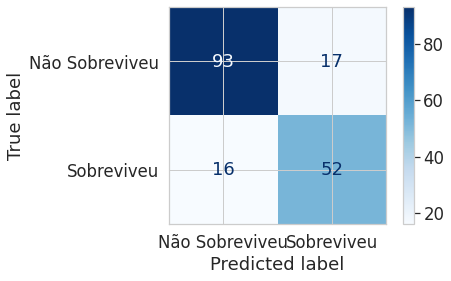

In [186]:
# Heatmap da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test,display_labels=['Não Sobreviveu','Sobreviveu'],
                                 cmap=plt.cm.Blues)

### Naive Bayes - Caso 2



* Avaliando o comportamento ao se remover algumas variáveis do conjunto original

In [170]:
# Colunas de X
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'num_familiares', 'Sex', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [171]:
X_train.head()

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
510,3,29.0,7.7500,0,1,1,0
832,3,25.0,7.2292,0,1,0,0
815,1,38.0,0.0000,0,1,0,1
717,2,27.0,10.5000,0,0,0,1
84,2,17.0,10.5000,0,0,0,1


* Vamos remover as variáveis [Embarked_Q,	Embarked_S,num_familiares] para avaliar se faz diferença no resultado:

In [172]:
# Criando X_train2 e X_test2 a partir da remoção  das variáveis [Embarked_Q,	Embarked_S,num_familiares] na série de Treino e Série de Teste

X_train2 = X_train.drop(['Embarked_Q',	'Embarked_S','num_familiares'],axis = 1)
X_test2 = X_test.drop(['Embarked_Q',	'Embarked_S','num_familiares'],axis = 1)

In [187]:
# Novamente,sem validação cruzada, considerando apenas treinar no conjunto de treino e testar no conjunto de teste
from sklearn.naive_bayes import GaussianNB                                                                  # carregando pacote 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix                          # carregando métricas de avaliação

classifier = GaussianNB(priors=None, var_smoothing=1e-09)                                                   # chamando o classificador
classifier.fit(X_train2,y_train)                                                                            # ajustando os dados na série de treino

# prevendo na série de teste
y_pred = classifier.predict(X_test2)                                                                        # Prevendo para X_test2

# Métricas
acuracia_nb2 = accuracy_score(y_test, y_pred,normalize=True)                                                # Acurácia 
print(acuracia_nb2)

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_nb2 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])                  # Relatório de Resultados
print(cr_nb2)

# Matriz de confusão:
# Matriz de Confusão
cm_nb2 = confusion_matrix(y_test,y_pred)      # matriz de confusão (y_real, y_previsto)
matriz_confusao_nb2 = pd.DataFrame(cm_nb2, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_nb2)    


0.8146067415730337
                precision    recall  f1-score   support

Não Sobreviveu       0.86      0.84      0.85       110
    Sobreviveu       0.75      0.78      0.76        68

      accuracy                           0.81       178
     macro avg       0.80      0.81      0.81       178
  weighted avg       0.82      0.81      0.82       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       92                   18
Real Sobreviveu                           15                   53


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Naive Bayes - Comparando caso 1 com caso 2


  - Usando validação cruzada;
  - Avaliar a média e desvio-padrão das amostras obtidas para os 2 casos

In [188]:
kfold           # lembrando que já criamos um objeto que separa as amostras aleatoriamente

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [189]:
from sklearn.model_selection import cross_val_score                      # chamando pacote para validação cruzada
classifier = GaussianNB(priors=None, var_smoothing=1e-09)                # instanciando o classificador  
acuracia_nb_caso1 = cross_val_score(classifier, X = X_train, y = y_train, scoring = "accuracy", cv = kfold)         # validação cruzada caso 1 (é semelhante a um for)
acuracia_nb_caso2 = cross_val_score(classifier, X = X_train2, y = y_train, scoring = "accuracy", cv = kfold)        # validação cruzada caso 2 (é semelhante a um for)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [190]:
# Resultado da acurácia encontrado para para um dos K, sendo k=10 no total para o caso 1
acuracia_nb_caso1

array([0.73239437, 0.83098592, 0.8028169 , 0.78873239, 0.76056338,
       0.76056338, 0.78873239, 0.78873239, 0.8028169 , 0.76056338])

In [191]:
# Resultado da acurácia encontrado para para um dos K, sendo k=10 no total para o caso 2
acuracia_nb_caso2

array([0.73239437, 0.81690141, 0.76056338, 0.73239437, 0.73239437,
       0.77464789, 0.76056338, 0.77464789, 0.78873239, 0.78873239])

In [192]:
# Caso 1 - resumo da validação cruzada

print(f'Média da cv: {round(np.mean(acuracia_nb_caso1),3)}')        # média da validação cruzada
print(f'Desvio-padrão cv: {round(np.std(acuracia_nb_caso1),3)}')    # desvio-padrão da validação cruzada 
print(acuracia_nb_caso1)      # todas as acurácias

Média da cv: 0.782
Desvio-padrão cv: 0.027
[0.73239437 0.83098592 0.8028169  0.78873239 0.76056338 0.76056338
 0.78873239 0.78873239 0.8028169  0.76056338]


In [193]:
# Caso 2 - resumo da validação cruzada

print(f'Média da cv: {round(np.mean(acuracia_nb_caso2),3)}')            # média da validação cruzada
print(f'Desvio-padrão cv: {round(np.std(acuracia_nb_caso2),3)}')        # desvio-padrão da validação cruzada        
print(acuracia_nb_caso2)      # todas as acurácias

Média da cv: 0.766
Desvio-padrão cv: 0.027
[0.73239437 0.81690141 0.76056338 0.73239437 0.73239437 0.77464789
 0.76056338 0.77464789 0.78873239 0.78873239]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


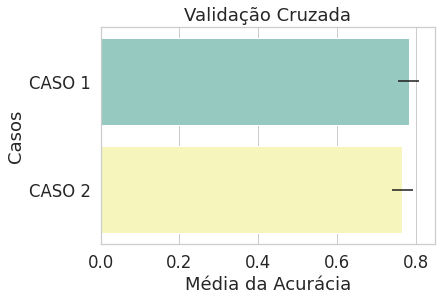

In [194]:
# Resultados da validação cruzada no caso 1 e caso 2 
sns.set(font_scale=1.5, style = "whitegrid")
cv_nb_casos = pd.DataFrame({"Médias Validação Cruzada":[round(np.mean(acuracia_nb_caso1),3),round(np.mean(acuracia_nb_caso2),3)],"Desvio-padrão Validação Cruzada": [round(np.std(acuracia_nb_caso1),3),round(np.std(acuracia_nb_caso2),3)],
                            "Casos":["CASO 1","CASO 2"]})

g = sns.barplot("Médias Validação Cruzada","Casos",data = cv_nb_casos, palette="Set3",orient = "h",**{'xerr':[round(np.std(acuracia_nb_caso1),3),round(np.std(acuracia_nb_caso2),3)]})
g.set_xlabel("Média da Acurácia")
g = g.set_title("Validação Cruzada")

Qual caso você escolheria (caso 1 ou caso 2)?


## 4.2 - Regressão Logística

Referência:

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<br>

Comandos:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Regressão Logística -  Caso 1

  - Ajuste Treino e Teste
  - Estudo de Regressão Logística com parâmetros default

In [199]:
# Iniciação, ajuste e previsão
from sklearn.linear_model import LogisticRegression                                                # importando Regressão Logística
classifier = LogisticRegression(C=1.0,  max_iter=200, class_weight=None)                           # chamando classificador regressão logística

# Ajuste
classifier.fit(X_train,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test)                                                                # prevendo na série de teste

# Métricas
acuracia_rl1 = accuracy_score(y_test, y_pred,normalize=True)                                       # Acurácia 
print(round(acuracia_rl1,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_rl1 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_rl1)

# Matriz de Confusão:
cm_rl1 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_rl1 = pd.DataFrame(cm_rl1, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_rl1)  

0.815
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       110
    Sobreviveu       0.77      0.74      0.75        68

      accuracy                           0.81       178
     macro avg       0.80      0.80      0.80       178
  weighted avg       0.81      0.81      0.81       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       95                   15
Real Sobreviveu                           18                   50


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Regressão Logística -  Otimização dos Parâmetros

Otimizando o parâmetro C por validação cruzada

In [ ]:
# Ajustando o parâmetro C
# LogisticRegression(C=1.0,  max_iter=200, class_weight=None)

In [200]:
from sklearn.model_selection import cross_val_score                      # chamando pacote para validação cruzada

# Possíveis valores de C que iremos testar:
C_param_range = [0.001,0.01,0.1,1,10,100]          

# Tabela para receber as medidas da validação cruzada para cada C de C_param_range:
rl_acc_table = pd.DataFrame(columns = ['C: '+str(i) for i in C_param_range])


for i in C_param_range:   # Para cada valor em C_param_range

  # Iniciação, ajuste e previsão
  from sklearn.linear_model import LogisticRegression                                                # importando Regressão Logística
  classifier = LogisticRegression(C=i,  max_iter=200, class_weight=None)                             # chamando classificador regressão logística

  # Validação cruzada para cada C = i
  vc = cross_val_score(classifier, X = X_train, y = y_train, scoring = "accuracy", cv = kfold)
  rl_acc_table['C: '+str(i)] = vc         # adicionando na tabela


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [201]:
# Tabela com todos os valores obtidos na validação cruzada para cada C
rl_acc_table

,C: 0.001,C: 0.01,C: 0.1,C: 1,C: 10,C: 100
0,0.647887,0.676056,0.718310,0.732394,0.732394,0.732394
1,0.718310,0.760563,0.859155,0.859155,0.859155,0.859155
2,0.704225,0.746479,0.816901,0.802817,0.802817,0.802817
3,0.690141,0.718310,0.802817,0.788732,0.788732,0.788732
4,0.605634,0.690141,0.774648,0.788732,0.788732,0.788732
5,0.676056,0.760563,0.774648,0.788732,0.788732,0.788732
6,0.690141,0.732394,0.816901,0.830986,0.830986,0.830986
7,0.605634,0.661972,0.774648,0.830986,0.830986,0.830986
8,0.746479,0.802817,0.830986,0.802817,0.802817,0.802817
9,0.647887,0.718310,0.859155,0.802817,0.802817,0.802817


In [202]:
# Média da acurácia para cada C
rl_acc_table.mean()

C: 0.001    0.673239
C: 0.01     0.726761
C: 0.1      0.802817
C: 1        0.802817
C: 10       0.802817
C: 100      0.802817
dtype: float64

In [203]:
# Desvio-padrão da acurácia para cada C
rl_acc_table.std()

C: 0.001    0.046382
C: 0.01     0.043131
C: 0.1      0.043538
C: 1        0.033855
C: 10       0.033855
C: 100      0.033855
dtype: float64

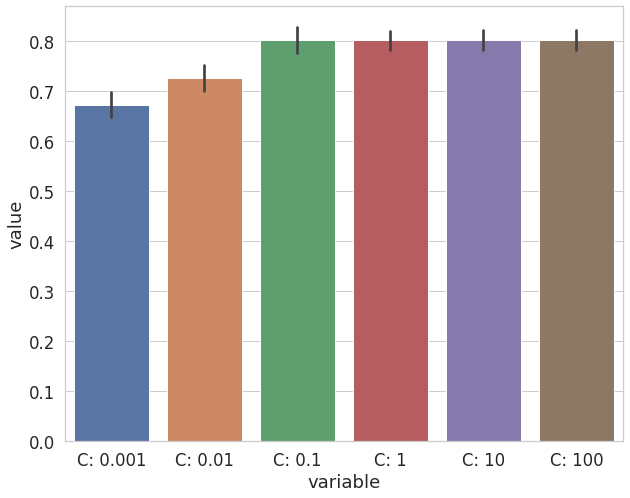

In [204]:
plt.figure(figsize=(10,8))   # tamanho da figura
sns.barplot(x="variable", y="value", data=pd.melt(rl_acc_table))    # boxplot de todas as variáveis do dataframe

 <font color=red> O parâmetro default (C = 1) parece ser bom para o estudo, sendo assim não necessário alterar o valor de C.

## 4.3 - KNN - K Nearest Neighbors Classification

Referência:

https://scikit-learn.org/stable/modules/neighbors.html#classification

<br>

Comandos:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### KNN - Caso 1

  - KNN -  Ajuste Treino e Teste

In [207]:
# Iniciação, ajuste e previsão
from sklearn.neighbors import KNeighborsClassifier                                                  # importando KNN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')                           # chamando classificador KNN

# Ajuste
classifier.fit(X_train,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test)                                                                # prevendo na série de teste


# Métricas
acuracia_knn1 = accuracy_score(y_test, y_pred,normalize=True)                                      # Acurácia 
print(round(acuracia_knn1,3))


# Relatório de Avaliação: Precisão, Recall, F1-score
cr_knn1 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_knn1)


# Matriz de Confusão:
cm_knn1 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_knn1 = pd.DataFrame(cm_knn1, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_knn1)  

0.753
                precision    recall  f1-score   support

Não Sobreviveu       0.78      0.83      0.81       110
    Sobreviveu       0.69      0.63      0.66        68

      accuracy                           0.75       178
     macro avg       0.74      0.73      0.73       178
  weighted avg       0.75      0.75      0.75       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       91                   19
Real Sobreviveu                           25                   43


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


<font color=red>
- Observar que o KNN apresentou um resultado inferior aos demais.

<br>

<font color=red>
- Este comportamento pode ter acontecido pela diferença de escalas das variáveis. Atentar que KNN utiliza métricas de distâncias.

<br>

<font color=red>
- Se os dados não estiverem normalizados, as distâncias com escalas maiores serão mais favorecidas 

### KNN - Caso 2

-  Normalizando os dados antes de aplicar o método Min-Max

In [209]:
from sklearn.preprocessing import MinMaxScaler          # transformar os dados com normalização MinMaxScaler (normaliza os dados para o intervalo 0-1)

In [210]:
X_train.head()  # possível notar que as variáveis estão em diferentes escalas, o que pode prejudicar o ajuste

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
510,3,29.0,7.7500,0,1,1,0
832,3,25.0,7.2292,0,1,0,0
815,1,38.0,0.0000,0,1,0,1
717,2,27.0,10.5000,0,0,0,1
84,2,17.0,10.5000,0,0,0,1


In [211]:
# transformar os dados com normalização MinMaxScaler (normaliza os dados para o intervalo 0-1)
sc_x = MinMaxScaler()                       # chamando a função de normalização
X_train1 = sc_x.fit_transform(X_train)      # Normaliza X_train
X_test1 = sc_x.transform(X_test)            # normaliza os dados com os parâmetros de X_train
# convert the array back to a dataframe
X_train1 = pd.DataFrame(X_train1,columns = X_train.columns)          

In [212]:
X_train1.head()     # notar a mudança de escala das variáveis

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
0,1.0,0.388421,0.029468,0.0,1.0,1.0,0.0
1,1.0,0.334058,0.027487,0.0,1.0,0.0,0.0
2,0.0,0.510737,0.000000,0.0,1.0,0.0,1.0
3,0.5,0.361239,0.039924,0.0,0.0,0.0,1.0
4,0.5,0.225333,0.039924,0.0,0.0,0.0,1.0


In [213]:
X_train1.describe()            # possível também notar esta mudança das escalas no resumo estatístico

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,0.661268,0.385964,0.116049,0.088873,0.652113,0.084507,0.729577
std,0.416149,0.177565,0.158699,0.156487,0.476636,0.278343,0.444491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.293286,0.030133,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.334058,0.054959,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.483555,0.114270,0.100000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
# Comandos semelhantes, mas agora com os dados normalizados
# Iniciação, ajuste e previsão
from sklearn.neighbors import KNeighborsClassifier                                  # importando KNN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')           # chamando classificador regressão logística

# Ajuste
classifier.fit(X_train1,y_train)                            # ajustando os dados na série de treino (X_train1 -dados normalizados)

# Previsão
y_pred = classifier.predict(X_test1)                        # prevendo na série de teste (X_train1 - dados normalizados)

# Métricas
acuracia_knn2 = accuracy_score(y_test, y_pred,normalize=True)                                                      # Acurácia 
print(round(acuracia_knn2,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_knn2 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_knn2)


# Matriz de Confusão:
cm_knn2 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_knn2 = pd.DataFrame(cm_knn2, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_knn2)  

0.831
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.89      0.87       110
    Sobreviveu       0.81      0.74      0.77        68

      accuracy                           0.83       178
     macro avg       0.83      0.81      0.82       178
  weighted avg       0.83      0.83      0.83       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       98                   12
Real Sobreviveu                           18                   50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [ ]:
acuracia_knn1

### KNN - Caso 3

 -  Normalizando os dados antes de aplicar o método StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler      # transformar os dados com normalização StandardScaler (normaliza os dados pela média e variância)

In [216]:
# transformar os dados com normalização StandardScale
sc_x = StandardScaler()
X_train2 = sc_x.fit_transform(X_train)
X_test2 = sc_x.transform(X_test)         # normaliza os dados com os parâmetros de X_train
# convert the array back to a dataframe
X_train2 = pd.DataFrame(X_train2, columns = X_train.columns)

In [217]:
X_train2.head()

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
0,0.814542,0.013844,-0.545952,-0.568328,0.730395,3.291403,-1.642534
1,0.814542,-0.292528,-0.558439,-0.568328,0.730395,-0.303822,-1.642534
2,-1.590135,0.703182,-0.731766,-0.568328,0.730395,-0.303822,0.608816
3,-0.387797,-0.139342,-0.480018,-0.568328,-1.369122,-0.303822,0.608816
4,-0.387797,-0.905273,-0.480018,-0.568328,-1.369122,-0.303822,0.608816


In [218]:
X_train2.describe()

,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
count,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02
mean,6.139064e-16,1.540239e-16,6.708249e-17,-1.125860e-16,-3.283758e-17,-2.639516e-16,-2.262666e-16
std,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00
min,-1.590135e+00,-2.175186e+00,-7.317658e-01,-5.683280e-01,-1.369122e+00,-3.038218e-01,-1.642534e+00
25%,-3.877965e-01,-5.223076e-01,-5.417562e-01,-5.683280e-01,-1.369122e+00,-3.038218e-01,-1.642534e+00
50%,8.145420e-01,-2.925284e-01,-3.852122e-01,-5.683280e-01,7.303953e-01,-3.038218e-01,6.088155e-01
75%,8.145420e-01,5.499955e-01,-1.121336e-02,7.115359e-02,7.303953e-01,-3.038218e-01,6.088155e-01
max,8.145420e-01,3.460533e+00,5.573916e+00,5.826488e+00,7.303953e-01,3.291403e+00,6.088155e-01


In [219]:
# Iniciação, ajuste e previsão
from sklearn.neighbors import KNeighborsClassifier                                                  # importando KNN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')                           # chamando classificador regressão logística

# Ajuste
classifier.fit(X_train2,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test2)                                                                # prevendo na série de teste

# Métricas
acuracia_knn3 = accuracy_score(y_test, y_pred,normalize=True)                                                      # Acurácia 
print(round(acuracia_knn3,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_knn3 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_knn3)


# Matriz de Confusão:
cm_knn3 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_knn3 = pd.DataFrame(cm_knn3, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_knn3)  

0.831
                precision    recall  f1-score   support

Não Sobreviveu       0.85      0.88      0.87       110
    Sobreviveu       0.80      0.75      0.77        68

      accuracy                           0.83       178
     macro avg       0.82      0.82      0.82       178
  weighted avg       0.83      0.83      0.83       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       97                   13
Real Sobreviveu                           17                   51


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [220]:
# Resumo dos resultados
print(f'Acurácia na série de teste para KNN sem normalização: {round(acuracia_knn1,3)}')                        # Sem normalização
print(f'Acurácia na série de teste para KNN com normalização min-max: {round(acuracia_knn2,3)}')                # Com normalização Min-Max
print(f'Acurácia na série de teste para KNN com normalização StandardScaler: {round(acuracia_knn3,3)}')         # Com normalização standardScaler

Acurácia na série de teste para KNN sem normalização: 0.753
Acurácia na série de teste para KNN com normalização min-max: 0.831
Acurácia na série de teste para KNN com normalização StandardScaler: 0.831


### KNN - Caso 4  

 - Normalizando os dados com método Min-Max + otimização dos parâmetros

In [222]:
from sklearn.model_selection import cross_val_score                      # chamando pacote para validação cruzada
from sklearn.preprocessing import MinMaxScaler                           # comando para normalização Min-Max
from sklearn.neighbors import KNeighborsClassifier                       # Comando para KNN

# Possíveis valores de K que iremos testar:
K_param_range = np.arange(1,21)                          # iremos verificar o melhor número de vizinhos (que vai retornar melhor métrica)         

# 1 - Normalização MinMaxScaler
sc_x = MinMaxScaler()
X_train1 = sc_x.fit_transform(X_train)
X_test1 = sc_x.transform(X_test)         # normaliza os dados com os parâmetros de X_train
X_train1 = pd.DataFrame(X_train1)        # converter o array de novo para dataframe


# Para cada k, registrar a média da acurácia e o desvio-padrão da acurácia:
knn_acc_table = pd.DataFrame(columns = ['K: '+str(i) for i in K_param_range],index = ['media','desvio-padrao'])


for i in K_param_range:   # Para cada valor em K_param_range

  # Classificador
  classifier = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')                  # chamando classificador KNN, a cada iteração novo n_neighbors = i

  # Validação cruzada para cada K = i
  vc = cross_val_score(classifier, X = X_train1, y = y_train, scoring = "accuracy", cv = kfold)


  # Média e Desvio padrão:
  media_vc = np.mean(vc)
  sd_vc = np.std(vc)

  # Adicionando informação no dataframe
  knn_acc_table.loc['desvio-padrao','K: '+str(i)] = sd_vc         # adicionando na tabela desvio-padrão
  knn_acc_table.loc['media','K: '+str(i)] = media_vc              # adicionando na tabela média

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

([<matplotlib.axis.XTick at 0x7f12668a1358>,
 <a list of 20 Text major ticklabel objects>)

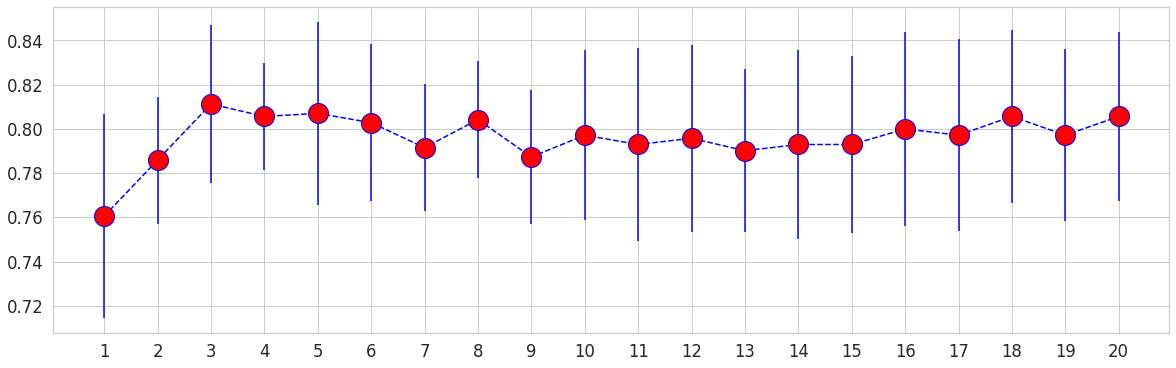

In [223]:
# Mostrando o resultado de média e desvio padrão de cada K em forma de figura
plt.figure(figsize=(20,6))
plt.errorbar(x = K_param_range,y = knn_acc_table.loc['media',:], yerr = knn_acc_table.loc['desvio-padrao',:],color="blue", linestyle="dashed", marker="o",markerfacecolor="red", markersize="20")
plt.xticks(range(1,21,1))

Pensando na média , k=3 foi o melhor, mas a variação foi alta. O k =4 tem um resultado muito parecido, mas com um desvio menor. 

In [224]:
knn_acc_table

,K: 1,K: 2,K: 3,K: 4,K: 5,K: 6,K: 7,K: 8,K: 9,K: 10,K: 11,K: 12,K: 13,K: 14,K: 15,K: 16,K: 17,K: 18,K: 19,K: 20
media,0.760563,0.785915,0.811268,0.805634,0.807042,0.802817,0.791549,0.804225,0.787324,0.797183,0.792958,0.795775,0.790141,0.792958,0.792958,0.8,0.797183,0.805634,0.797183,0.805634
desvio-padrao,0.0462864,0.0287269,0.0357425,0.0242319,0.0413279,0.0356313,0.0287269,0.026312,0.030502,0.0384174,0.043662,0.0423707,0.0369702,0.0427436,0.0398619,0.0440014,0.0432741,0.0392349,0.0389304,0.0382103


In [225]:
# Refazendo o processo de série de treino e teste com normalização Min-Max e k=3 vizinhos
from sklearn.neighbors import KNeighborsClassifier                                                  # importando KNN
from sklearn.preprocessing import MinMaxScaler


# 1 - Normalização MinMaxScaler
sc_x = MinMaxScaler()
X_train1 = sc_x.fit_transform(X_train)
X_test1 = sc_x.transform(X_test)         # normaliza os dados com os parâmetros de X_train
X_train1 = pd.DataFrame(X_train1)        # converter o array de novo para dataframe

# Iniciação, ajuste e previsão
classifier = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')                           # chamando classificador regressão logística

# Ajuste
classifier.fit(X_train1,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test1)                                                                # prevendo na série de teste

# Métricas
acuracia_knn4 = accuracy_score(y_test, y_pred,normalize=True)                                                      # Acurácia 
print(round(acuracia_knn4,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_knn4 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_knn4)

# Matriz de Confusão:
cm_knn4 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_knn4 = pd.DataFrame(cm_knn4, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_knn4)

0.831
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.92      0.87       110
    Sobreviveu       0.84      0.69      0.76        68

      accuracy                           0.83       178
     macro avg       0.83      0.80      0.81       178
  weighted avg       0.83      0.83      0.83       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                      101                    9
Real Sobreviveu                           21                   47


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [226]:
print(f'Acurácia na série de teste para KNN sem normalização: {round(acuracia_knn1,3)}')
print(f'Acurácia na série de teste para KNN com normalização min-max: {round(acuracia_knn2,3)}')
print(f'Acurácia na série de teste para KNN com normalização StandardScaler: {round(acuracia_knn3,3)}')
print(f'Acurácia na série de teste para KNN com normalização min-max e parâmetro otimizado: {round(acuracia_knn4,3)}')

Acurácia na série de teste para KNN sem normalização: 0.753
Acurácia na série de teste para KNN com normalização min-max: 0.831
Acurácia na série de teste para KNN com normalização StandardScaler: 0.831
Acurácia na série de teste para KNN com normalização min-max e parâmetro otimizado: 0.831


## 4.4 - SVM - Support Vector Machine

Referência:

https://scikit-learn.org/stable/modules/svm.html#svm-classification

<br>

Comandos:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### SVM - Caso 1

 -  Ajuste Treino e Teste

In [229]:
# Iniciação, ajuste e previsão
from sklearn.svm import SVC                                                            # importando SVM
classifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', class_weight=None)      # chamando classificador SVC


# Ajuste
classifier.fit(X_train,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test)                                                                # prevendo na série de teste

# Métricas
acuracia_svm1 = accuracy_score(y_test, y_pred,normalize=True)                                      # Acurácia 
print(round(acuracia_svm1,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_svm1 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_svm1)

# Matriz de Confusão:
cm_svm1 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_svm1 = pd.DataFrame(cm_svm1, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_svm1)  

0.646
                precision    recall  f1-score   support

Não Sobreviveu       0.66      0.86      0.75       110
    Sobreviveu       0.57      0.29      0.39        68

      accuracy                           0.65       178
     macro avg       0.62      0.58      0.57       178
  weighted avg       0.63      0.65      0.61       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       95                   15
Real Sobreviveu                           48                   20


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM - Caso 2

  - Normalizando os dados antes de aplicar o método Min-Max

In [230]:
from sklearn.preprocessing import MinMaxScaler

# transformar os dados com normalização MinMaxScaler
sc_x = MinMaxScaler()
X_train1 = sc_x.fit_transform(X_train)
X_test1 = sc_x.transform(X_test)         # normaliza os dados com os parâmetros de X_train
# convert the array back to a dataframe
X_train1 = pd.DataFrame(X_train1)


# Iniciação, ajuste e previsão
from sklearn.svm import SVC                                                 # importando SVM
classifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', class_weight=None)      # chamando classificador SVC


# Ajuste
classifier.fit(X_train1,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test1)                                                                # prevendo na série de teste

# Métricas
acuracia_svm2 = accuracy_score(y_test, y_pred,normalize=True)                                      # Acurácia 
print(round(acuracia_svm2,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_svm2 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_svm2)


# Matriz de Confusão:
cm_svm2 = confusion_matrix(y_test,y_pred)                        # matriz de confusão (y_real, y_previsto)
matriz_confusao_svm2 = pd.DataFrame(cm_svm2, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_svm2)

0.837
                precision    recall  f1-score   support

Não Sobreviveu       0.81      0.96      0.88       110
    Sobreviveu       0.91      0.63      0.75        68

      accuracy                           0.84       178
     macro avg       0.86      0.80      0.81       178
  weighted avg       0.85      0.84      0.83       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                      106                    4
Real Sobreviveu                           25                   43


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM - Caso 3

 - Normalização MinMax + Otimização de Parâmetros

In [231]:
from sklearn.model_selection import cross_val_score                      # chamando pacote para validação cruzada
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Possíveis valores de C que iremos testar:
C_param_range = [0.001,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000]          

# 1 - Normalização MinMaxScaler
sc_x = MinMaxScaler()
X_train1 = sc_x.fit_transform(X_train)
X_test1 = sc_x.transform(X_test)         # normaliza os dados com os parâmetros de X_train
X_train1 = pd.DataFrame(X_train1)        # converter o array de novo para dataframe


# Para cada k, registrar a média da acurácia e o desvio-padrão da acurácia:
svm_acc_table = pd.DataFrame(columns = ['C: '+str(i) for i in C_param_range],index = ['media','desvio-padrao'])


for i in C_param_range:   # Para cada valor em C_param_range

  # Classificador
  classifier = SVC(C=i, kernel='rbf', degree=3, gamma='scale', class_weight=None)      # chamando classificador SVC

  # Validação cruzada para cada C = i
  vc = cross_val_score(classifier, X = X_train1, y = y_train, scoring = "accuracy", cv = kfold)


  # Média e Desvio padrão:
  media_vc = np.mean(vc)
  sd_vc = np.std(vc)

  # Adicionando informação no dataframe
  svm_acc_table.loc['desvio-padrao','C: '+str(i)] = sd_vc         # adicionando na tabela desvio-padrão
  svm_acc_table.loc['media','C: '+str(i)] = media_vc              # adicionando na tabela média

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

([<matplotlib.axis.XTick at 0x7f12667fa198>,
 [Text(0, 0, '0.001'),
  Text(0, 0, '0.01'),
  Text(0, 0, '0.05'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.5'),
  Text(0, 0, '1'),
  Text(0, 0, '5'),
  Text(0, 0, '10'),
  Text(0, 0, '50'),
  Text(0, 0, '100'),
  Text(0, 0, '500'),
  Text(0, 0, '1000')])

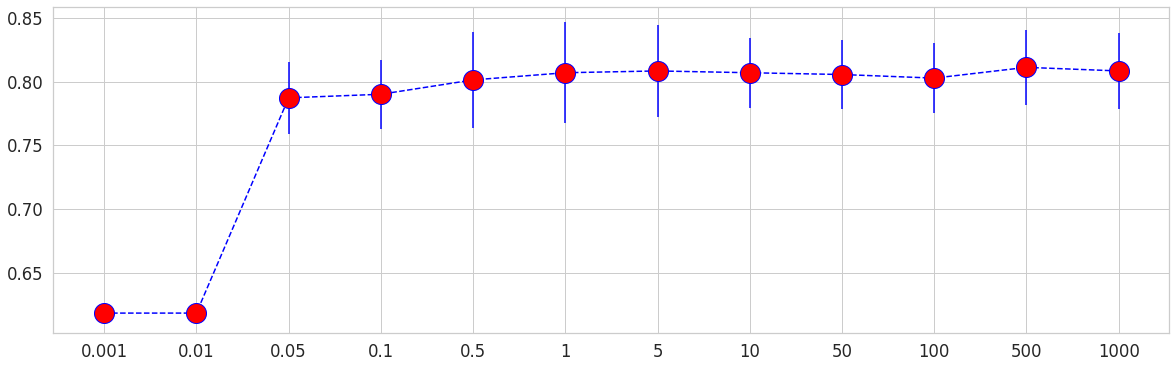

In [232]:
plt.figure(figsize=(20,6))
plt.errorbar(x = range(len(C_param_range)),y = svm_acc_table.loc['media',:], yerr = svm_acc_table.loc['desvio-padrao',:],color="blue", linestyle="dashed", marker="o",markerfacecolor="red", markersize="20")
plt.xticks(np.arange(len(C_param_range)), C_param_range)

Refazendo o processo com C = 10 (métrica boa, com desvio-padrão não muito alto)

In [234]:
# Refazendo o processo de série de treino e teste com normalização Min-Max e C=10
from sklearn.svm import SVC                                                # importando SVC
from sklearn.preprocessing import MinMaxScaler


# 1 - Normalização MinMaxScaler
sc_x = MinMaxScaler()
X_train1 = sc_x.fit_transform(X_train)
X_test1 = sc_x.transform(X_test)         # normaliza os dados com os parâmetros de X_train
X_train1 = pd.DataFrame(X_train1)        # converter o array de novo para dataframe

# Iniciação, ajuste e previsão
classifier = SVC(C=10, kernel='rbf', degree=3, gamma='scale', class_weight=None)                   # chamando classificador SVC                           # chamando classificador regressão logística

# Ajuste
classifier.fit(X_train1,y_train)                                                                    # ajustando os dados na série de treino

# Previsão
y_pred = classifier.predict(X_test1)                                                                # prevendo na série de teste

# Métricas
acuracia_svm3 = accuracy_score(y_test, y_pred,normalize=True)                                      # Acurácia 
print(round(acuracia_svm3,3))

# Relatório de Avaliação: Precisão, Recall, F1-score
cr_svm3 = classification_report(y_test,y_pred,target_names=['Não Sobreviveu','Sobreviveu'])
print(cr_svm3)

# Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm_svm3 = confusion_matrix(y_test,y_pred)
matriz_confusao_svm3 = pd.DataFrame(cm_svm3, columns = ['Previsão Não Sobreviveu', 'Previsão Sobreviveu'], index = ['Real Não Sobreviveu', 'Real Sobreviveu'] )
print(matriz_confusao_svm3)


0.837
                precision    recall  f1-score   support

Não Sobreviveu       0.81      0.96      0.88       110
    Sobreviveu       0.91      0.63      0.75        68

      accuracy                           0.84       178
     macro avg       0.86      0.80      0.81       178
  weighted avg       0.85      0.84      0.83       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                      106                    4
Real Sobreviveu                           25                   43


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Resumo de todas as etapas

In [236]:
# Análise da Série de Teste

# Naive Bayes:

print('Naiva Bayes')
# Caso 1 - Treino e Teste apenas
print("")
print("Caso 1: Treino e Teste apenas")
print(acuracia_nb1)
print(cr_nb1)
print(matriz_confusao_nb1)
print("")
# Caso 2 - Treino e Teste apenas, removendo variáveis
print("")
print("Caso 2: Treino e Teste apenas, removendo variáveis")
print(acuracia_nb2)
print(cr_nb2)
print(matriz_confusao_nb2)


# Regressão Logística:

print('Regressão Logística')
# Caso 1 - Treino e Teste apenas
print("")
print("Caso 1:  Treino e Teste apenas")
print(acuracia_rl1)
print(cr_rl1)
print(matriz_confusao_rl1)
print("")


# KNN:

print('KNN')
# Caso 1 - Treino e Teste apenas
print("")
print("Caso 1: Treino e Teste apenas")
print(acuracia_knn1)
print(cr_knn1)
print(matriz_confusao_knn1)
print("")

# Caso 2 - Treino e Teste com normalização Min-Max
print("")
print("Caso 2: Treino e Teste com normalização Min-Max")
print(acuracia_knn2)
print(cr_knn2)
print(matriz_confusao_knn2)
print("")

# Caso 3 - Treino e Teste com normalização StandardScaler
print("")
print("Caso 3: Treino e Teste com normalização StandardScaler")
print(acuracia_knn3)
print(cr_knn3)
print(matriz_confusao_knn3)
print("")

# Caso 4 - Normalizando os dados com método Min-Max + otimização dos parâmetros
print("")
print("Caso 4: Normalizando os dados com método Min-Max + otimização dos parâmetros")
print(acuracia_knn4)
print(cr_knn4)
print(matriz_confusao_knn4)
print("")



# SVM:

print('SVM')
# Caso 1 - Treino e Teste apenas
print("")
print("Caso 1: Treino e Teste apenas")
print(acuracia_svm1)
print(cr_svm1)
print(matriz_confusao_svm1)
print("")

# Caso 2 - Treino e Teste com normalização Min-Max
print("")
print("Caso 2: Treino e Teste com normalização Min-Max")
print(acuracia_svm2)
print(cr_svm2)
print(matriz_confusao_svm2)
print("")

# Caso 3 - Treino e Teste com normalização normalização Min-Max + Otimização do Parâmetro C"
print("")
print("Caso 3: Treino e Teste com normalização normalização Min-Max + Otimização do Parâmetro C")
print(acuracia_svm3)
print(cr_svm3)
print(matriz_confusao_svm3)
print("")

Naiva Bayes

Caso 1: Treino e Teste apenas
0.8146067415730337
               precision    recall  f1-score   support

Não Sobrevieu       0.85      0.85      0.85       110
   Sobreviveu       0.75      0.76      0.76        68

     accuracy                           0.81       178
    macro avg       0.80      0.81      0.80       178
 weighted avg       0.82      0.81      0.81       178

                     Previsão Não Sobreviveu  Previsão Sobreviveu
Real Não Sobreviveu                       93                   17
Real Sobreviveu                           16                   52


Caso 2: Treino e Teste apenas, removendo variáveis
0.8146067415730337
                precision    recall  f1-score   support

Não Sobreviveu       0.86      0.84      0.85       110
    Sobreviveu       0.75      0.78      0.76        68

      accuracy                           0.81       178
     macro avg       0.80      0.81      0.81       178
  weighted avg       0.82      0.81      0.82       1